In [4]:
import pandas as pd

In [5]:
document_df = pd.read_csv('./booking_bcn1.csv')
document_df.head()

,Unnamed: 0,Hotels,Prices,Descriptions,Full_Descriptions
0,0,Hotel Alimara,"€ 1,011",1 single bed,You're eligible for a Genius discount at Hotel...
1,1,DO Plaça Reial powered by Sonder,"€ 2,659",1 large double bed,You're eligible for a Genius discount at DO Pl...
2,2,SM Hotel Teatre Auditori,"€ 1,278",Beds: 1 double or 2 singles,SM Hotel Teatre Auditori is located opposite t...
3,3,Unite Hostel Barcelona,"€ 2,048",Multiple bed types,"Set in Barcelona, 400 metres from Nova Icaria,..."
4,4,Hotel Lloret Ramblas,"€ 1,345",1 double bed,Hotel Lloret Ramblas is situated on Barcelona’...


'''
    1.lemmatizing
    2.Remove Punctuation
    3.Unify, lowercase
    4.Remove stop words
    5.Stemming
    
    #unify: 1.get rid of non-words
    #2. delete the punctations characters in a word'( { [' 
    #2.2 remove stop words
    #3. lowercasting: everything
'''

In [5]:
!pip install pandas
!pip install nltk
!pip install spacy
!pip install scikit-learn
!pip install matplotlib
!pip install tqdm
!python -m spacy download en_core_web_sm


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 279.3 kB/s eta 0:00:46
     --------------------------------------- 0.1/12.8 MB 357.2 kB/s eta 0:00:36
     --------------------------------------- 0.1/12.8 MB 435.7 kB/s eta 0:00:30
     --------------------------------------- 0.1/12.8 MB 450.6 kB/s eta 0:00:29
     --------------------------------------- 0.2/12.8 MB 437.1 kB/s eta 0:00:29
      -------------------------------------- 0.2/12.8 MB 512.0 kB/s eta 0:00:25
      -------------------------------------- 0.2/12.8 MB 497.6 kB/s eta 0:00:26
      -------------------------------------- 0.3/12.8 MB 587.7 kB/s eta 0:00:22
      -------------------------------------- 0.3/12.8 MB 593.9 kB/

In [6]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\surface\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\surface\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\surface\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
import pandas as pd
import numpy as np
import csv

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from nltk.stem import PorterStemmer
#nltk.download('stopwords')
from nltk.corpus import stopwords

#!python -m spacy download en_core_web_sm
import spacy
#sp = spacy.load('en_core_web_sm')
# Load a multilingual model
#!python -m spacy download xx_ent_wiki_sm
nlp = spacy.load('xx_ent_wiki_sm')

import re


from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD


import os

import re



from tqdm import tqdm
tqdm.pandas()


#getting a library of stopwords and defining a lemmatizer
porter=SnowballStemmer("english")
lmtzr = WordNetLemmatizer()

stop_words = set(stopwords.words('english'))

#set paths for input and output
path= 'C:\\Users\\surface\\DSDM\\Semesters\\semester2\\text mining\\Mini_Research01'

spitout= 'C:\\Users\\surface\\DSDM\\Semesters\\semester2\\text mining\\Mini_Research01\\'


### Language problem: English and Spanish recognition over documents
1. Language Detection and Separate Processing:
Detect the Language: Use a language detection library to identify the language of each sentence or segment of the text. There are various libraries available for this, like langdetect in Python.
Process Separately: Once you've identified the segments of text in English and Spanish, you can process them separately using language-specific tools (e.g., tokenizers, lemmatizers, etc.) for English and Spanish.
2. Multilingual Models:
Use Multilingual NLP Tools: Some NLP tools and models are designed to handle multiple languages. For instance, BERT has multilingual versions (like mBERT or DistilBERT) that can process text in many languages, including English and Spanish. These models can be particularly useful for tasks like sentiment analysis, translation, or classification.
3. Translate and Then Process:
Translate into One Language: If your analysis tools are specific to one language, you might consider translating all the text into that language. However, translation can introduce errors and may not always capture the nuances of the original text.
4. Hybrid Approach:
Combine Methods: In some cases, a combination of the above methods might be the best approach. For instance, you might use language detection to split the text and then apply a multilingual model for certain tasks.

In [8]:
#!pip install langdetect

# Example
from langdetect import detect

text = "This is an example. Este es un ejemplo."

for sentence in text.split('. '):
    language = detect(sentence)
    print(f"Sentence: '{sentence}', Language: {language}")

Sentence: 'This is an example', Language: en
Sentence: 'Este es un ejemplo.', Language: es


## Base tokenize, text preprocess function

In [9]:
#additional functions
#substitute \W+ to '', Hello ,World! = HelloWorld
def strip(word):
    mod_string = re.sub(r'\W+', '', word)
    return mod_string

def abbr_or_lower(word):
    # we keep this 2-char abbr convention
    if re.match('([A-Z]+[a-z]*){2,}', word):
        return word
    else:
        return word.lower()
    
# tokenize by split each word: 'a+b' = ['a','b']
def tokenize(text, modulation):
    if modulation<2:
        #split(\W+) example
        #"Hello, world! This is a test."
        #["Hello", "world", "This", "is", "a", "test"]
        tokens = re.split(r'\W+', text)
        stems = []
        # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
        for token in tokens:
            lowers=abbr_or_lower(token)
            if lowers not in stop_words:
                if re.search('[a-zA-Z]', lowers):
                    if modulation==0:
                        stems.append(lowers)
                    if modulation==1:
                        stems.append(porter.stem(lowers))
    else:
        #using spaCy's language model, to process text and add spaCy notations
        sp_text=sp(text)
        stems = []
        lemmatized_text=[]
        for word in sp_text:
            ########################## grammar pos ##############################
            ############## possible to use this on lemm #########################
            ###################### !!!!!!!!!!!!! ################################
            lemmatized_text.append(word.lemma_)
        stems = [abbr_or_lower(strip(w)) for w in lemmatized_text if (abbr_or_lower(strip(w))) and (abbr_or_lower(strip(w)) not in stop_words)]
    return " ".join(stems)

def vectorize(tokens, vocab):
    vector=[]
    for w in vocab:
        vector.append(tokens.count(w))
    return vector

### Example on multilingual text process with spaCy

In [1]:
# download on terminal
# python -m spacy download xx_ent_wiki_sm

import spacy

# Load a multilingual model
nlp = spacy.load('xx_ent_wiki_sm')

# Example text with mixed English and Spanish
text = "This is an English text with a Spanish address: Calle Gran Vía, Madrid."

# Process the text
doc = nlp(text)

# Extract entities or other linguistic features
for ent in doc.ents:
    print(ent.text, ent.label_)


English MISC
Spanish MISC
Calle Gran Vía LOC
Madrid LOC


### Example on separate handle language

In [ ]:
from langdetect import detect
import spacy

# Load language-specific models
nlp_en = spacy.load('en_core_web_sm')  # English model
# You can load a Spanish model similarly if needed

text = "Your text with mixed English and Spanish."

# Split text into sentences or segments
segments = text.split('.')  # Simple split, can be more complex

for segment in segments:
    lang = detect(segment)
    if lang == 'en':
        # Process with English model
        doc = nlp_en(segment)
        # Further processing...
    elif lang == 'es':
        # Process with Spanish model or specific logic for addresses
        # ...


## Begin Corpus

In [22]:
#loading the data

# default sep = ',' means: separate each column by sep = ','
# age, sex, income
# 15, 0, 120
# 26, 1, 500
# 30, 0, 1000
df = pd.read_csv('./booking_bcn1.csv', sep=',', encoding='utf-8')

print(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         51 non-null     int64 
 1   Hotels             51 non-null     object
 2   Prices             51 non-null     object
 3   Descriptions       51 non-null     object
 4   Full_Descriptions  50 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.1+ KB
None


,Unnamed: 0,Hotels,Prices,Descriptions,Full_Descriptions
0,0,Hotel Alimara,"€ 1,011",1 single bed,You're eligible for a Genius discount at Hotel...
1,1,DO Plaça Reial powered by Sonder,"€ 2,659",1 large double bed,You're eligible for a Genius discount at DO Pl...
2,2,SM Hotel Teatre Auditori,"€ 1,278",Beds: 1 double or 2 singles,SM Hotel Teatre Auditori is located opposite t...
3,3,Unite Hostel Barcelona,"€ 2,048",Multiple bed types,"Set in Barcelona, 400 metres from Nova Icaria,..."
4,4,Hotel Lloret Ramblas,"€ 1,345",1 double bed,Hotel Lloret Ramblas is situated on Barcelona’...


### Operate on df to prepare for corpus

In [23]:
corpus_data = df
corpus_data = corpus_data.rename(columns={'Unnamed: 0': 'hotel_id'})
corpus_data['Prices'] = corpus_data['Prices'].replace({'€':'',',':''}, regex = True).astype(float)

print(corpus_data.info())
display(corpus_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hotel_id           51 non-null     int64  
 1   Hotels             51 non-null     object 
 2   Prices             51 non-null     float64
 3   Descriptions       51 non-null     object 
 4   Full_Descriptions  50 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.1+ KB
None


,hotel_id,Hotels,Prices,Descriptions,Full_Descriptions
0,0,Hotel Alimara,1011.0,1 single bed,You're eligible for a Genius discount at Hotel...
1,1,DO Plaça Reial powered by Sonder,2659.0,1 large double bed,You're eligible for a Genius discount at DO Pl...
2,2,SM Hotel Teatre Auditori,1278.0,Beds: 1 double or 2 singles,SM Hotel Teatre Auditori is located opposite t...
3,3,Unite Hostel Barcelona,2048.0,Multiple bed types,"Set in Barcelona, 400 metres from Nova Icaria,..."
4,4,Hotel Lloret Ramblas,1345.0,1 double bed,Hotel Lloret Ramblas is situated on Barcelona’...


### Tokenize on selected column
should apply text preprocess by mode

In [68]:
#add percentage load bar to the column
def load_bar(corpus_data, col, mod):
    #percentage load bar
    text_preproc = (
        corpus_data.Descriptions
        .astype(str)
        .progress_apply(lambda row: tokenize(row, mod))
    )
    
    corpus_data[col]=text_preproc
    
    print("done with column: {col}")
    return corpus_data

In [69]:

#=0 means just lowercase, #=1 means stemming, =2 means lemmatizing
###########################################################
###########################################################
mod=1
###########################################################
###########################################################


# load with bar and requried a mod value
load_bar(corpus_data,'Descriptions', 1)
load_bar(corpus_data,'Full_Descriptions', 1)

corpus_data = corpus_data.dropna(subset=['Descriptions']).reset_index(drop=True)
corpus_data = corpus_data.dropna(subset=['Full_Descriptions']).reset_index(drop=True)

corpus_data  = corpus_data[['hotel_id','Hotels', 'Prices',
                            'Descriptions','Full_Descriptions']]


corpus_data.info()

display(corpus_data)


100%|████████████████████████████████████████████████████████████████████████████████| 51/51 [00:00<00:00, 1888.83it/s]


done with column: {col}


100%|████████████████████████████████████████████████████████████████████████████████| 51/51 [00:00<00:00, 2684.03it/s]


done with column: {col}
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hotel_id           51 non-null     int64  
 1   Hotels             51 non-null     object 
 2   Prices             51 non-null     float64
 3   Descriptions       51 non-null     object 
 4   Full_Descriptions  51 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.1+ KB


,hotel_id,Hotels,Prices,Descriptions,Full_Descriptions
0,0,Hotel Alimara,1011.0,singl bed,singl bed
1,1,DO Plaça Reial powered by Sonder,2659.0,larg doubl bed,larg doubl bed
2,2,SM Hotel Teatre Auditori,1278.0,bed doubl singl,bed doubl singl
3,3,Unite Hostel Barcelona,2048.0,multipl bed type,multipl bed type
4,4,Hotel Lloret Ramblas,1345.0,doubl bed,doubl bed
5,5,The Streets Apartments Rambla,2035.0,larg doubl bed,larg doubl bed
6,6,Sallés Hotel Pere IV,1939.0,multipl bed type,multipl bed type
7,7,Aparthotel Napols - Abapart,1791.0,doubl bed,doubl bed
8,8,Apartamentos DV,1220.0,larg doubl bed,larg doubl bed
9,9,Hotel Concordia Barcelona,1607.0,doubl bed,doubl bed


In [28]:
print(corpus_data.Descriptions[35])

bed doubl singl


In [29]:
print(corpus_data.Full_Descriptions[35])

astoria barcelona diagon avenu minut walk diagon metro station paseo de gracia avenu featur rooftop pool view gym astoria hotel combin origin art nouveau featur modern facil air condit room satellit tv safe minibar featur wooden floor free wi fi modern bathroom come hairdryer restaur astoria offer tradit catalan cuisin room servic avail also terrac bar hour front desk


## As we choose mod=1
This is mod 1: DTV
mod 1 = only apply stem and lower case </br>
We should not remove stop words, cause some meaning could be captured from that

### As we will repeat process_vocabulary and build_DTV, we make functions

In [33]:
# process the choosen column of corup_data to vocabularies
def process_Vocabulary(corpus_data, col):
  #build vocabulary
    vocab, index = {}, 1  # start indexing from 1
    for doc in corpus_data[col]:
        print(doc)
        tokens = doc.split()
        for token in tokens:
          if token not in vocab:
            vocab[token] = index
            index += 1  
    return vocab, index

In [34]:
# build document term vactor from processed vocabularies
def build_DTV(corpus_data, col, vocabulary):
  #build vectors
    vectors=[]
    for doc in corpus_data[col]:
        vectors.append(vectorize(doc, vocabulary))

    df = pd.DataFrame(vectors)
    return df

### DTV On Description corpus

In [38]:
%%time

vocab, index = process_Vocabulary(corpus_data, 'Descriptions')
vocab_stem_Descriptions = vocab
vocab_stem_Descriptions_size = len(vocab)

df_mod1_Descriptions = build_DTV(corpus_data, 'Descriptions', vocab_stem_Descriptions )
display(df_mod1_Descriptions.head())

print(vocab_stem_Descriptions)
print(" ")
print("Total size of stemmed vocabulary:", vocab_stem_Descriptions_size)

singl bed
larg doubl bed
bed doubl singl
multipl bed type
doubl bed
larg doubl bed
multipl bed type
doubl bed
larg doubl bed
doubl bed
bed doubl singl
bed doubl singl
singl bed
doubl bed
bed doubl singl
doubl bed
larg doubl bed
larg doubl bed
bed doubl singl
singl bed
bed doubl singl
doubl bed
bed doubl singl
larg doubl bed
extra larg doubl bed
bed doubl singl
extra larg doubl bed
doubl bed
bed doubl singl
bed singl larg doubl
manag privat host
bed doubl singl
bed doubl singl
extra larg doubl bed
extra larg doubl bed
bed doubl singl
bed doubl singl
bed doubl singl
singl bed
singl bed
multipl bed type
multipl bed type
doubl bed
bed doubl singl
bed doubl singl
bed doubl singl
multipl bed type
bed doubl singl
bed doubl singl
bed doubl singl
doubl bed


,0,1,2,3,4,5,6,7,8,9
0,1,1,0,0,0,0,0,0,0,0
1,0,1,1,1,0,0,0,0,0,0
2,1,1,0,1,0,0,0,0,0,0
3,0,1,0,0,1,1,0,0,0,0
4,0,1,0,1,0,0,0,0,0,0


{'singl': 1, 'bed': 2, 'larg': 3, 'doubl': 4, 'multipl': 5, 'type': 6, 'extra': 7, 'manag': 8, 'privat': 9, 'host': 10}
 
Total size of stemmed vocabulary: 10
CPU times: total: 15.6 ms
Wall time: 18 ms


### DTV on Full_Descriptions corpus

In [45]:
%%time

vocab, index = process_Vocabulary(corpus_data, 'Full_Descriptions')
vocab_stem_Full_Descriptions = vocab
vocab_stem_Full_Descriptions_size = len(vocab)

df_mod1_Full_Descriptions = build_DTV(corpus_data, 'Full_Descriptions', vocab_stem_Full_Descriptions)
display(df_mod1_Full_Descriptions.head())

print(vocab_stem_Full_Descriptions)
print(" ")
print("Total size of stemmed vocabulary:", vocab_stem_Full_Descriptions_size)

elig genius discount hotel alimara save properti sign hotel alimara modern hotel locat barcelona horta district central garden sever meet room room flat screen tvs fit centr room alimara hotel air condit heat privat bathroom hairdryer alimara restaur serv mediterranean food modern twist children menus avail hotel bar summum featur terrac serv food drink snack hotel locat minut walk mundet metro station minut journey central barcelona gaudí icon parc güell metro stop away mundet
elig genius discount do plaça reial power sonder save properti sign set plaza reial las rambla do plaça reial power sonder featur spa rooftop pool stylish room bar café found squar surround gothic quarter spacious air condit room offer free wi fi flat screen tv free minibar morn do plaça reial offer paid breakfast creativ mediterranean cuisin tapa dish also serv restaur hotel spa featur sauna famous boquería market minut walk away barcelona cathedr liceu metro plaza catalunya within km hotel
sm hotel teatr audit

,0,1,2,3,4,5,6,7,8,9,...,744,745,746,747,748,749,750,751,752,753
0,1,1,1,6,4,1,1,1,2,2,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,2,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,4,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,4,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


{'elig': 1, 'genius': 2, 'discount': 3, 'hotel': 4, 'alimara': 5, 'save': 6, 'properti': 7, 'sign': 8, 'modern': 9, 'locat': 10, 'barcelona': 11, 'horta': 12, 'district': 13, 'central': 14, 'garden': 15, 'sever': 16, 'meet': 17, 'room': 18, 'flat': 19, 'screen': 20, 'tvs': 21, 'fit': 22, 'centr': 23, 'air': 24, 'condit': 25, 'heat': 26, 'privat': 27, 'bathroom': 28, 'hairdryer': 29, 'restaur': 30, 'serv': 31, 'mediterranean': 32, 'food': 33, 'twist': 34, 'children': 35, 'menus': 36, 'avail': 37, 'bar': 38, 'summum': 39, 'featur': 40, 'terrac': 41, 'drink': 42, 'snack': 43, 'minut': 44, 'walk': 45, 'mundet': 46, 'metro': 47, 'station': 48, 'journey': 49, 'gaudí': 50, 'icon': 51, 'parc': 52, 'güell': 53, 'stop': 54, 'away': 55, 'do': 56, 'plaça': 57, 'reial': 58, 'power': 59, 'sonder': 60, 'set': 61, 'plaza': 62, 'las': 63, 'rambla': 64, 'spa': 65, 'rooftop': 66, 'pool': 67, 'stylish': 68, 'café': 69, 'found': 70, 'squar': 71, 'surround': 72, 'gothic': 73, 'quarter': 74, 'spacious': 75, 

## CountVectorize

In [54]:
%%time
# build vector matrix by CountVectorize
# conver DTV to document term matrix to term counts
# ngram_range is range of gram we want to experiment: (1,1): uni-gram; (1,2): uni-gram, bigram
# maximizing dimensions of DTM (1,3) take all uni-gram, bigram, trigram
def build_vectorMatrix(corpus_data, col, ngram_range = (1,2)):
    cv = CountVectorizer(ngram_range = ngram_range )
    cv.fit(corpus_data[col])


    vectorized_text = cv.transform(corpus_data[col])
    # convert DT-matrix from sparse(many 0) to dense
    vectorized_text = vectorized_text.todense()
    features = cv.get_feature_names_out()
    return vectorized_text, features

CPU times: total: 0 ns
Wall time: 0 ns


### mod 1: Descriptions corpus

In [65]:
vectorized_text_stem_Descriptions, features_Descriptions = build_vectorMatrix(corpus_data, 'Descriptions', ngram_range = (1,3))
print("document term matrix has size", vectorized_text_stem_Descriptions.shape)
print("length of vectorized from countVectorize: ", len(vectorized_text_stem_Descriptions))
print("document term matrix: ", vectorized_text_stem_Descriptions)
print(features_Descriptions)

document term matrix has size (51, 29)
length of vectorized from countVectorize:  51
document term matrix:  [[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
['bed' 'bed doubl' 'bed doubl singl' 'bed singl' 'bed singl larg'
 'bed type' 'doubl' 'doubl bed' 'doubl singl' 'extra' 'extra larg'
 'extra larg doubl' 'host' 'larg' 'larg doubl' 'larg doubl bed' 'manag'
 'manag privat' 'manag privat host' 'multipl' 'multipl bed'
 'multipl bed type' 'privat' 'privat host' 'singl' 'singl bed'
 'singl larg' 'singl larg doubl' 'type']


### mod 1: Full_Descriptions corpus

In [66]:
vectorized_text_stem_Full_Descriptions, features_Full_Descriptions = build_vectorMatrix(corpus_data, 'Full_Descriptions', ngram_range = (1,3))
print("document term matrix has size", vectorized_text_stem_Full_Descriptions.shape)
print("length of vectorized from countVectorize: ", len(vectorized_text_stem_Full_Descriptions))
print("document term matrix: ", vectorized_text_stem_Full_Descriptions)
print("features:", features_Full_Descriptions)

document term matrix has size (51, 6964)
length of vectorized from countVectorize:  51
document term matrix:  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
features: ['11th' '11th floor' '11th floor sagrada' ... 'zoo' 'zoo ciutadella'
 'zoo ciutadella metro']


### Plot HeatMap of DT-Matrix

In [59]:
#!pip install matplotlib seaborn

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# plot densed DT-Matrix
# feature_names are terms
def plot_densed_DTMatrix_HeatMap(vectorized_text, feature_names):

    df = pd.DataFrame(vectorized_text, columns=feature_names)

    # Plotting
    plt.figure(figsize=(10, 10))  # Adjust the size as needed
    sns.heatmap(df, annot=False, cmap='YlGnBu')  # annot=False to not display the frequency values
    plt.title("Heatmap of Document-Term Matrix")
    plt.xlabel("Terms")
    plt.ylabel("Documents")
    plt.show()

### mod 1: Descriptions

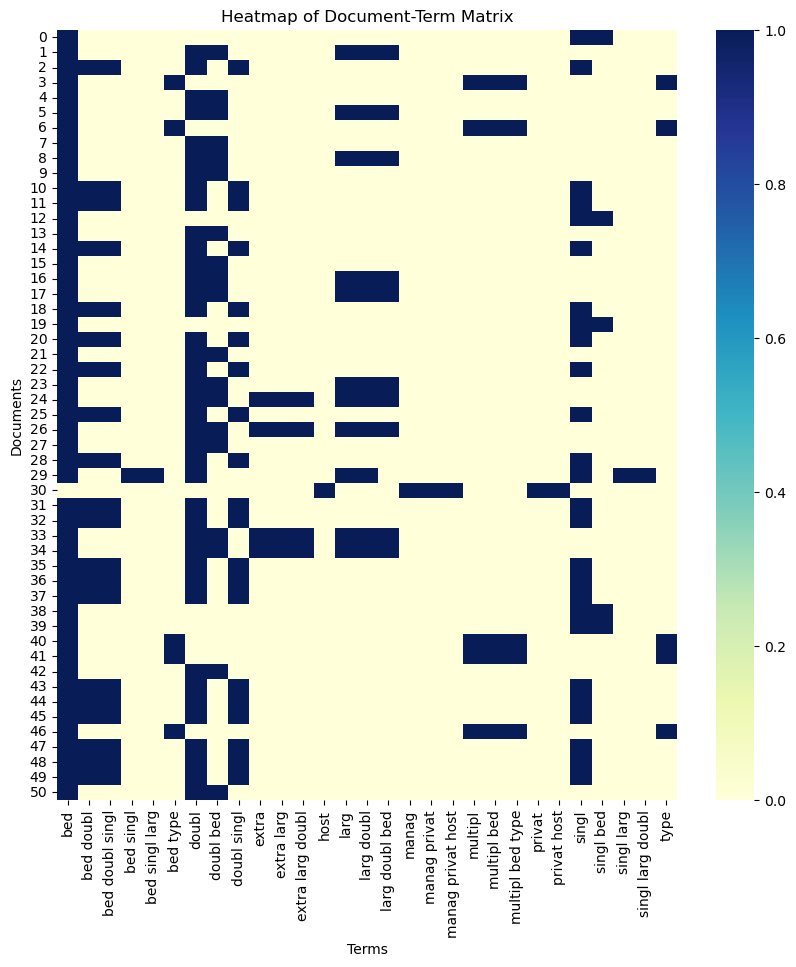

In [62]:
plot_densed_DTMatrix_HeatMap(vectorized_text_stem_Descriptions, features_Descriptions)

#### bed is the term that appears most in heavy color in every documents

### mod 1: Descriptions

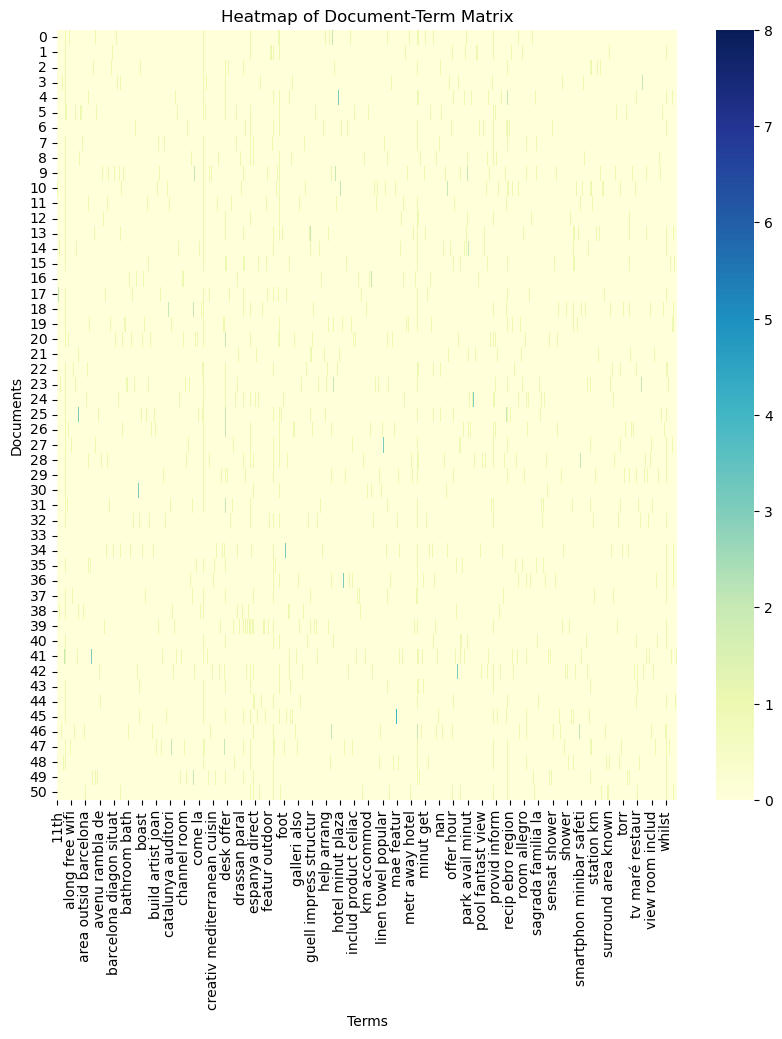

In [63]:
plot_densed_DTMatrix_HeatMap(vectorized_text_stem_Full_Descriptions, features_Full_Descriptions)

#### heavy color vector is relative less and scattered over the matrix, but this also give our information on dirty vectors

## tf-idf